## 💡WHAT ARE THE TRENDS IN THE TOP FIVE MOST IN-DEMAND SKILLS FOR DATA ANALYSTS?

* STEPS: 
    1. Import all necessary libraries, datasets & clean up data
    2. Identify the top five most in-demand skills for data analysts and analyze their current trends using `.pivot_table` function
    3. Plot the data using a line chart 


## Step 1: Import all necessary libraries, datasets & Clean all data 

Similar to [1_Skills_Demand.ipynb](1_Skills_Demand.ipynb), we will have to go import all the necessary libraries, load the datasets and clean up those data in order to use them efficiently. 

In [2]:
#Import 
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

#Load datasets 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() 

#Data clean up 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 
df['job_posted_month'] = df['job_posted_date'].dt.month
df_exploded = df.explode(column='job_skills')

In this analysis, I will focus mainly on the 'Data Analyst' role in the United States for the sake of data variety. 

In [ ]:
#Filtering Data Analyst jobs in the United States 
df_US = df_exploded[(df_exploded['job_title_short'] == 'Data Analyst') & (df_exploded['job_country'] == 'United States')]

## Step 2: Identify the top five most in-demand skills for data analysts and analyze their current trends.

By using the `.pivot_table()` function, I will create a pivot table that count the amount of time each skills appear each month. 

In [3]:
#Creating a pivot table to track the number of skills posted each month.
df_pivot = df_US.pivot_table(index='job_posted_month',columns='job_skills',aggfunc='size',fill_value=0)

#Sorting the pivot table by the total number of skills posted each month.
df_pivot.loc['Total'] = df_pivot.sum(axis=0)
df_pivot.sort_values(by='Total',axis=1,ascending=False,inplace=True)
df_pivot.drop(index='Total',inplace=True)

df_pivot


job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,1,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


Overall, we can see that SQL, Excel, Tableau, Python, Sas are the 5 most in-demand skills for Data Analyst throughout the year. 

Similar to [1_Skills_Demand.ipynb](1_Skills_Demand.ipynb), expressing the data in percentage is more informative and comprehensible. Therefore, I will create a column that depicts the percentage of each skill posted each month. This can be done by dividing the number of times a skill appear in a month with the amount of jobs that appear in that corresponding month. 

In [4]:
#Creating a column depicting the percentage of each skill posted each month. 
df_div = df_US['job_posted_month'].value_counts()
df_divided = df_pivot.div(df_div/100,axis=0)
df_divided.reset_index(inplace=True) 

df_divided

job_skills,job_posted_month,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
0,1,14.161716,11.056050,7.657977,6.937733,5.638832,4.656961,4.115239,2.979470,2.991782,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.003078,0.003078,0.000000,0.000000
1,2,13.657527,11.152785,7.225384,6.975341,5.225039,4.505087,4.837041,3.181583,3.039317,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,3,13.862748,11.434833,7.752138,7.232177,5.319926,4.903098,4.529242,3.162735,2.874823,...,0.004297,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,4,13.813221,10.934752,7.674488,7.202608,5.585346,4.452833,4.534340,2.981425,2.788383,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00429,0.000000,0.000000,0.000000,0.000000
4,5,13.726533,11.264160,7.615806,7.174387,5.169388,4.610966,4.573738,2.962293,2.738925,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.005318
5,6,13.362592,11.121487,7.601083,7.512373,4.594267,4.748343,4.617611,3.366327,2.913437,...,0.000000,0.004669,0.000000,0.000000,0.004669,0.00000,0.000000,0.000000,0.000000,0.000000
6,7,13.267901,10.770952,7.795972,7.312856,5.065094,4.480269,4.480269,2.985151,2.791904,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
7,8,13.325007,10.659225,7.614847,7.903673,4.980290,4.960774,4.714882,2.935092,2.911674,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
8,9,13.122534,10.297902,7.736291,7.027274,4.894505,4.265538,4.688661,2.733147,2.715993,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
9,10,13.470798,10.058614,7.478543,7.185472,5.024074,4.369897,4.819971,2.606238,2.475403,...,0.000000,0.000000,0.000000,0.005233,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


It is evident that the index of this pivot table is not correctly formatted. After some data cleaning, I will create a dataframe that showcase the top 5 skills posted each month. 

In [5]:
#Minor clean-up 
df_divided['job_posted_mon'] = pd.to_datetime(df_divided['job_posted_month'],format='%m').dt.strftime('%b')  
df_data = df_divided.set_index('job_posted_mon') 
df_data.drop(columns='job_posted_month',inplace=True) 

df_data

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_mon,,,,,,,,,,,,,,,,,,,,,
Jan,14.161716,11.056050,7.657977,6.937733,5.638832,4.656961,4.115239,2.979470,2.991782,2.209979,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.003078,0.003078,0.000000,0.000000
Feb,13.657527,11.152785,7.225384,6.975341,5.225039,4.505087,4.837041,3.181583,3.039317,2.215899,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Mar,13.862748,11.434833,7.752138,7.232177,5.319926,4.903098,4.529242,3.162735,2.874823,1.796227,...,0.004297,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Apr,13.813221,10.934752,7.674488,7.202608,5.585346,4.452833,4.534340,2.981425,2.788383,1.883231,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00429,0.000000,0.000000,0.000000,0.000000
May,13.726533,11.264160,7.615806,7.174387,5.169388,4.610966,4.573738,2.962293,2.738925,1.903951,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.005318
Jun,13.362592,11.121487,7.601083,7.512373,4.594267,4.748343,4.617611,3.366327,2.913437,1.932954,...,0.000000,0.004669,0.000000,0.000000,0.004669,0.00000,0.000000,0.000000,0.000000,0.000000
Jul,13.267901,10.770952,7.795972,7.312856,5.065094,4.480269,4.480269,2.985151,2.791904,2.039260,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Aug,13.325007,10.659225,7.614847,7.903673,4.980290,4.960774,4.714882,2.935092,2.911674,1.889075,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Sep,13.122534,10.297902,7.736291,7.027274,4.894505,4.265538,4.688661,2.733147,2.715993,2.052719,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [ ]:
#Creating a DataFrame to showcase the top five skills posted each month.
df_plot = df_data.iloc[:, 0:5]

#Showing the results
df_plot

job_skills,sql,excel,tableau,python,sas
job_posted_mon,,,,,
Jan,14.161716,11.056050,7.657977,6.937733,5.638832
Feb,13.657527,11.152785,7.225384,6.975341,5.225039
Mar,13.862748,11.434833,7.752138,7.232177,5.319926
Apr,13.813221,10.934752,7.674488,7.202608,5.585346
May,13.726533,11.264160,7.615806,7.174387,5.169388
Jun,13.362592,11.121487,7.601083,7.512373,4.594267
Jul,13.267901,10.770952,7.795972,7.312856,5.065094
Aug,13.325007,10.659225,7.614847,7.903673,4.980290
Sep,13.122534,10.297902,7.736291,7.027274,4.894505


## Step 3: Plot the data using a line chart 

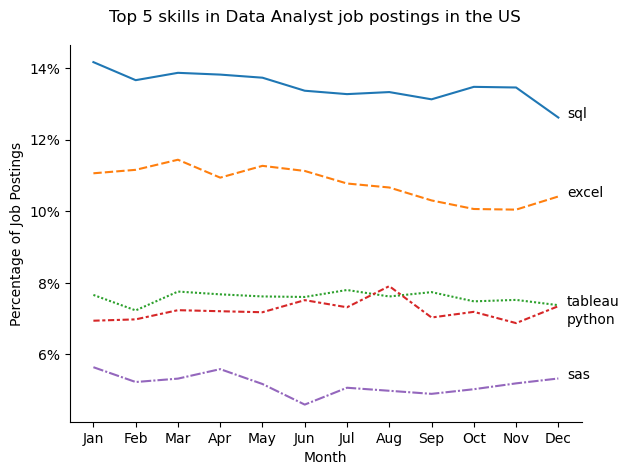

In [7]:
#Plotting the data 

sns.lineplot(data=df_plot)
plt.legend().remove()
ax = plt.gca() 
ax.set_xlabel('Month')
ax.set_ylabel('Percentage of Job Postings')
import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y / 100)))
for i in range(5): 
    column_name = df_plot.columns[i]
    y_position = df_plot.iloc[-1, i]

    # Adjust the position only for 'python'
    if column_name == 'python':
        plt.text(x=11.2, y=y_position - 0.5,  # Move Python label up
                 s=column_name, color='black')
    else:
        plt.text(x=11.2, y=y_position, 
                 s=column_name, color='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.suptitle('Top 5 skills in Data Analyst job postings in the US')
plt.tight_layout()
